In [62]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
np.random.seed(0)
from nltk import word_tokenize
from gensim.models import word2vec
import talos as ta
from keras.layers import Dropout
from talos.model.early_stopper import early_stopper
from talos.model.normalizers import lr_normalizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
%matplotlib inline



In [258]:
df = pd.read_csv('updated_target_merged_data.csv')

df.head()

,Date,retweet_from,tweet_length,encoded_sentiment,polarity,tweet,pc_1,pc_2,pc_3,pc_4,...,pc_30,pc_31,pc_32,pc_33,pc_34,pc_35,pc_36,pc_37,pc_38,signal_y
0,2017-09-29,171,105,1,0.366667,assuming acceleration of to but in a comfortab...,-0.031750,-0.028862,-0.030268,-0.018790,...,-0.034915,-0.030453,0.009013,-0.004715,-0.074266,-0.084025,0.019334,-0.004746,0.025779,down
1,2017-09-29,77,113,1,0.200000,is capable of transporting satellite to orbit ...,-0.059331,-0.099826,-0.154760,-0.040333,...,-0.015897,0.009704,-0.011633,-0.016697,-0.033227,0.000195,0.011908,-0.017864,-0.001426,down
2,2017-09-29,171,6,0,0.000000,yup,-0.002330,0.033960,0.069607,-0.014126,...,0.012970,-0.008978,-0.013865,0.046525,-0.007867,0.041954,-0.034317,-0.085269,-0.029201,down
3,2017-09-29,171,7,0,0.000000,part,-0.005050,0.024122,0.043361,-0.001799,...,-0.000544,-0.003106,-0.009162,-0.007540,0.008748,0.016646,-0.003052,-0.056231,-0.018816,down
4,2017-09-29,171,96,1,0.650000,fly to most place on earth in under min and an...,-0.031167,-0.027728,-0.012339,-0.039902,...,-0.000036,-0.000197,-0.007578,0.083160,-0.010546,-0.022204,-0.059491,0.048438,0.023978,down


In [259]:
df_pca = pd.read_csv('pca_updated_data.csv')

In [261]:
df_1 = df[['Date', 'retweet_from', 'tweet_length', 'encoded_sentiment', 'polarity', 'tweet', 'signal_y']]


In [263]:
df_2 = pd.concat([df_1, df_pca], axis=1)

In [265]:
df_2 = df_2.drop(columns=['Unnamed: 0'])

In [266]:
df_2

,Date,retweet_from,tweet_length,encoded_sentiment,polarity,tweet,signal_y,0,1,2,...,790,791,792,793,794,795,796,797,798,799
0,2017-09-29,171,105,1,0.366667,assuming acceleration of to but in a comfortab...,down,-0.031750,-0.028860,-0.030273,...,-0.014750,0.006987,-0.018947,0.003795,0.021159,0.007026,-0.077665,-0.005893,0.020216,-0.024430
1,2017-09-29,77,113,1,0.200000,is capable of transporting satellite to orbit ...,down,-0.059331,-0.099827,-0.154757,...,0.003511,-0.017758,-0.007694,0.003239,0.015531,0.019036,0.019721,0.019111,-0.011908,0.000386
2,2017-09-29,171,6,0,0.000000,yup,down,-0.002330,0.033969,0.069578,...,0.000253,0.001255,-0.001372,-0.001781,0.001782,0.001916,-0.002330,-0.002583,-0.001100,0.000627
3,2017-09-29,171,7,0,0.000000,part,down,-0.005050,0.024121,0.043358,...,-0.001174,-0.005936,-0.005910,0.017547,-0.001422,-0.002220,0.004902,0.000039,0.011071,0.011174
4,2017-09-29,171,96,1,0.650000,fly to most place on earth in under min and an...,down,-0.031167,-0.027728,-0.012323,...,0.003524,0.002561,-0.003482,0.002877,-0.018114,-0.014788,-0.011140,0.006785,0.002626,0.015714
5,2017-09-29,77,80,1,0.125000,supporting the creation of a permanent self su...,down,-0.022098,-0.021098,-0.019928,...,-0.019035,0.005167,0.007361,-0.014930,0.015815,0.012878,-0.103590,-0.044795,0.004917,0.027215
6,2017-09-29,171,57,-1,-0.166667,will take you anywhere on earth in than min,down,-0.030864,-0.014705,0.007456,...,-0.004858,-0.006783,-0.000320,-0.004073,-0.000498,-0.004615,-0.002140,-0.008353,0.013393,0.000666
7,2017-09-29,171,84,0,0.000000,mar city opposite of earth dawn and dusk sky a...,down,-0.024694,-0.022623,0.003114,...,-0.000047,-0.009445,-0.038989,0.006886,-0.007342,-0.004931,-0.013092,-0.022566,0.014179,0.017914
8,2017-09-29,171,16,-1,-0.800000,moon base alpha,down,-0.003928,0.022689,0.046858,...,-0.011843,0.001828,-0.001066,0.013197,0.000017,0.010389,-0.007440,0.005900,-0.016406,0.009333
9,2017-09-29,171,60,1,0.357143,will be something really special at talk,down,-0.019188,-0.006818,0.030090,...,0.003810,-0.013398,0.014402,-0.009557,-0.000274,-0.001698,0.001279,-0.028755,0.008977,0.004044


## Scale the data

we are scaling retweets_from and tweet_length

In [267]:
scaler = StandardScaler()

In [274]:
df_2[['retweet_from', 'tweet_length']] = scaler.fit_transform(df[['retweet_from', 'tweet_length']])



In [275]:
df_2.head()

,Date,retweet_from,tweet_length,encoded_sentiment,polarity,tweet,signal_y,0,1,2,...,790,791,792,793,794,795,796,797,798,799
0,2017-09-29,0.375794,0.748184,1,0.366667,assuming acceleration of to but in a comfortab...,down,-0.031750,-0.028860,-0.030273,...,-0.014750,0.006987,-0.018947,0.003795,0.021159,0.007026,-0.077665,-0.005893,0.020216,-0.024430
1,2017-09-29,-2.297408,0.946045,1,0.200000,is capable of transporting satellite to orbit ...,down,-0.059331,-0.099827,-0.154757,...,0.003511,-0.017758,-0.007694,0.003239,0.015531,0.019036,0.019721,0.019111,-0.011908,0.000386
2,2017-09-29,0.375794,-1.700349,0,0.000000,yup,down,-0.002330,0.033969,0.069578,...,0.000253,0.001255,-0.001372,-0.001781,0.001782,0.001916,-0.002330,-0.002583,-0.001100,0.000627
3,2017-09-29,0.375794,-1.675616,0,0.000000,part,down,-0.005050,0.024121,0.043358,...,-0.001174,-0.005936,-0.005910,0.017547,-0.001422,-0.002220,0.004902,0.000039,0.011071,0.011174
4,2017-09-29,0.375794,0.525590,1,0.650000,fly to most place on earth in under min and an...,down,-0.031167,-0.027728,-0.012323,...,0.003524,0.002561,-0.003482,0.002877,-0.018114,-0.014788,-0.011140,0.006785,0.002626,0.015714


In [276]:
df_2.tweet = df.tweet.astype(str)

## Check the class balance of our target classes

In [277]:
target = df.signal_y

In [278]:
target.head()

0    down
1    down
2    down
3    down
4    down
Name: signal_y, dtype: object

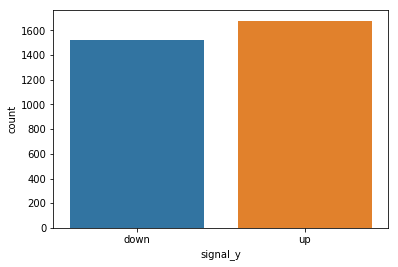

In [279]:
sns.countplot(df['signal_y'])

# Exploratory Data Analysis

In [280]:
df_graph = df_2[['tweet']]

df_graph['tweet_length'] = df_2['tweet'].apply(len)

df_graph['encoded_sentiment'] = df_2['encoded_sentiment']

df_graph['target'] = target

df_graph.head()

TypeError: object of type 'float' has no len()

In [281]:
df_graph['tweet_length'].describe()

KeyError: 'tweet_length'

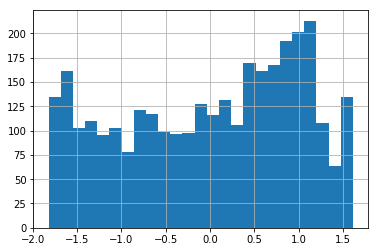

In [129]:
df['tweet_length'].hist(bins = 25)

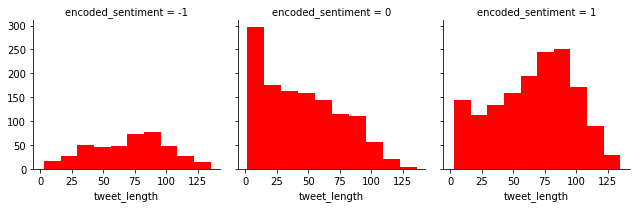

In [115]:
sentiment_graph = sns.FacetGrid(df_graph,col='encoded_sentiment')
sentiment_graph.map(plt.hist,'tweet_length', color='r')



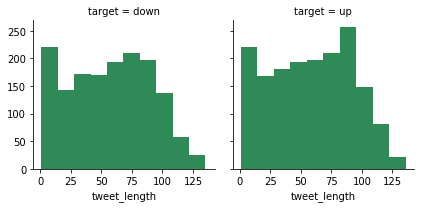

In [116]:
target_graph = sns.FacetGrid(df_graph,col='target')
target_graph.map(plt.hist,'tweet_length', color='seagreen')

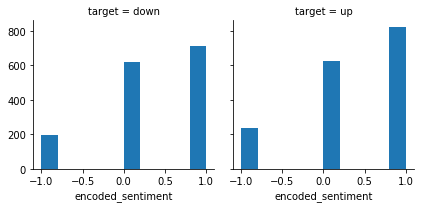

In [117]:
target_sentiment_graph = sns.FacetGrid(df_graph,col='target')
target_sentiment_graph.map(plt.hist,'encoded_sentiment')

# ANN Model for non tweet features

Make the dataframe for not tweet features, which include the tf-idf of the tweets.


In [282]:
y = pd.get_dummies(target).values

In [283]:
print(type(y))
y[:4]

<type 'numpy.ndarray'>


array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [286]:
df_no_tweet = df_2.drop(['signal_y', 'tweet', 'Date'], axis=1)

In [287]:
df_no_tweet.head()

,retweet_from,tweet_length,encoded_sentiment,polarity,0,1,2,3,4,5,...,790,791,792,793,794,795,796,797,798,799
0,0.375794,0.748184,1,0.366667,-0.031750,-0.028860,-0.030273,-0.018769,-0.060676,0.057752,...,-0.014750,0.006987,-0.018947,0.003795,0.021159,0.007026,-0.077665,-0.005893,0.020216,-0.024430
1,-2.297408,0.946045,1,0.200000,-0.059331,-0.099827,-0.154757,-0.040344,0.072303,0.209183,...,0.003511,-0.017758,-0.007694,0.003239,0.015531,0.019036,0.019721,0.019111,-0.011908,0.000386
2,0.375794,-1.700349,0,0.000000,-0.002330,0.033969,0.069578,-0.014138,-0.037713,-0.071401,...,0.000253,0.001255,-0.001372,-0.001781,0.001782,0.001916,-0.002330,-0.002583,-0.001100,0.000627
3,0.375794,-1.675616,0,0.000000,-0.005050,0.024121,0.043358,-0.001800,-0.016294,-0.051990,...,-0.001174,-0.005936,-0.005910,0.017547,-0.001422,-0.002220,0.004902,0.000039,0.011071,0.011174
4,0.375794,0.525590,1,0.650000,-0.031167,-0.027728,-0.012323,-0.039920,-0.070452,0.019524,...,0.003524,0.002561,-0.003482,0.002877,-0.018114,-0.014788,-0.011140,0.006785,0.002626,0.015714


In [288]:
# these are the features for the no_tweet ANN model
X = df_no_tweet.drop(columns=['encoded_sentiment']).as_matrix()

In [289]:
X[:2]

array([[ 3.75793919e-01,  7.48184035e-01,  3.66666667e-01, ...,
        -5.89298127e-03,  2.02159374e-02, -2.44296936e-02],
       [-2.29740768e+00,  9.46045275e-01,  2.00000000e-01, ...,
         1.91110158e-02, -1.19081575e-02,  3.86021435e-04]])

In [290]:
X.shape

(3205, 803)

In [291]:
# this is check the target for the Neural Network
print(type(y))

<type 'numpy.ndarray'>


In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [293]:
classifier = Sequential()
classifier.add(Dense(units = 15, kernel_initializer='uniform', activation = 'relu'))
classifier.add(Dense(units = 15, kernel_initializer='uniform', activation = 'relu'))
classifier.add(Dense(units = 2, kernel_initializer='uniform', activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
c = classifier.fit(X_train, y_train, batch_size = 10, epochs = 4, validation_split=0.1)


Train on 2307 samples, validate on 257 samples
Epoch 1/4
2307/2307 [==============================] - 5s 2ms/step - loss: 0.6931 - acc: 0.5139 - val_loss: 0.6911 - val_acc: 0.5720
Epoch 2/4
2307/2307 [==============================] - 2s 658us/step - loss: 0.6890 - acc: 0.5403 - val_loss: 0.6865 - val_acc: 0.5564
Epoch 3/4
2307/2307 [==============================] - 2s 659us/step - loss: 0.6246 - acc: 0.6925 - val_loss: 0.7237 - val_acc: 0.5525
Epoch 4/4
2307/2307 [==============================] - 2s 660us/step - loss: 0.5094 - acc: 0.7562 - val_loss: 0.8091 - val_acc: 0.5447


In [294]:
score_no_tweet, acc_no_tweet = classifier.evaluate(X_test, y_test, verbose = 2, batch_size = 32)
print("score for the test data no tweet model: %.3f" % (score_no_tweet))
print("acc for the test data  no tweet model: %.7f" % (acc_no_tweet))

score_train_no_tweet, acc_train_no_tweet = classifier.evaluate(X_train, y_train, verbose = 2, batch_size = 32)
print("score for the training data no tweet model: %.3f" % (score_train_no_tweet))
print("acc for the training data no tweet model: %.7f" % (acc_train_no_tweet))

score for the test data no tweet model: 0.837
acc for the test data  no tweet model: 0.4898596
score for the training data no tweet model: 0.457
acc for the training data no tweet model: 0.8028471


The neural network for the non-tweet data has a 66% accuracy rate.

In [295]:
def plot_train_val(model, label):
    plt.plot(model.history[label]) 
    plt.plot(model.history['val_' +label])
    plt.title('model '+label)
    plt.ylabel(label)
    plt.xlabel('epoch')
    plt.gca().legend(('train','val'))
    return plt.show()

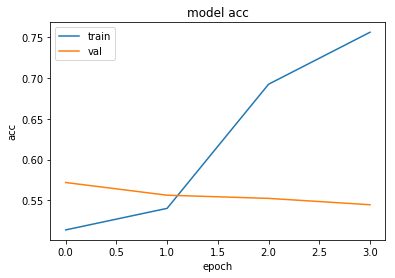

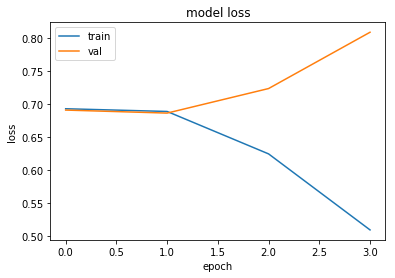

(None, None)

In [296]:
plot_train_val(c, 'acc'), plot_train_val(c, 'loss')

# ANN Model with tweets included

First, tokenize the tweets to feed into the model.

In [297]:
# set the tweet column to a string to account of data type errors
df_2.tweet = df_2.tweet.astype(str)

In [300]:
tokenizer = text.Tokenizer(num_words=15000)
tokenizer.fit_on_texts(list(df_2.tweet))
list_tokenized_tweets = tokenizer.texts_to_sequences(df_2.tweet)
X_t = sequence.pad_sequences(list_tokenized_tweets) 


In [301]:
print(type(X_t))
print(X_t.shape)
X_t[:3]

<type 'numpy.ndarray'>
(3205, 28)


array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 1328,  711,    4,    2,   16,    6,    3, 1633, 1329,
          12,  351,   36,    3, 2220,    2],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    5,
         712,    4, 1634,  156,    2,  151,  394,    9,  461,    2,    1,
           9,  127,    2,    1,  276,   47],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  505]], dtype=int32)

In [302]:
print(type(X))
print(X.shape)
X[:1]

<type 'numpy.ndarray'>
(3205, 803)


array([[ 3.75793919e-01,  7.48184035e-01,  3.66666667e-01,
        -3.17503623e-02, -2.88596117e-02, -3.02734905e-02,
        -1.87692485e-02, -6.06755412e-02,  5.77523566e-02,
        -1.24476225e-01,  1.16653635e-01,  5.91170817e-02,
        -2.97008009e-02, -4.78538790e-02,  7.31022161e-02,
         3.97427676e-02,  2.94557512e-02, -5.14425781e-02,
         1.73011505e-02,  1.47044217e-02, -3.64342311e-02,
         9.60998918e-03, -3.43125693e-02,  1.57833522e-03,
         8.37099108e-03,  1.23539684e-02,  1.64156431e-02,
         3.06772017e-02, -6.49284839e-04,  9.71982350e-03,
        -5.50731133e-02, -1.13178701e-02, -2.01777779e-02,
         4.33702399e-02,  1.80898678e-02,  1.13444648e-02,
        -3.74634668e-02, -1.27220095e-01, -2.26284430e-02,
         2.94634196e-03, -8.20366398e-02,  1.46922426e-02,
         5.41828824e-02, -6.26004630e-02, -4.51437589e-02,
         1.23467761e-01, -1.15357483e-02,  2.33041975e-02,
         4.17648570e-02,  4.62432608e-02, -3.77339721e-0

In [303]:
X_try = np.append(X_t, X, axis=1)

In [304]:
X_try.shape

(3205, 831)

In [305]:
# use X_try because it combines tweets vectors and pca vectors
X_try[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.32800000e+03,  7.11000000e+02,  4.00000000e+00,
        2.00000000e+00,  1.60000000e+01,  6.00000000e+00,  3.00000000e+00,
        1.63300000e+03,  1.32900000e+03,  1.20000000e+01,  3.51000000e+02,
        3.60000000e+01,  3.00000000e+00,  2.22000000e+03,  2.00000000e+00,
        3.75793919e-01,  7.48184035e-01,  3.66666667e-01, -3.17503623e-02,
       -2.88596117e-02, -3.02734905e-02, -1.87692485e-02, -6.06755412e-02,
        5.77523566e-02, -1.24476225e-01,  1.16653635e-01,  5.91170817e-02,
       -2.97008009e-02, -4.78538790e-02,  7.31022161e-02,  3.97427676e-02,
        2.94557512e-02, -5.14425781e-02,  1.73011505e-02,  1.47044217e-02,
       -3.64342311e-02,  9.60998918e-03, -3.43125693e-02,  1.57833522e-03,
        8.37099108e-03,  

In [306]:
X_train_tweet, X_test_tweet, y_train_tweet, y_test_tweet = train_test_split(X_try, y, test_size = 0.2, random_state = 0)



In [307]:
classifier = Sequential()
classifier.add(Dense(units = 15, kernel_initializer='uniform', activation = 'relu'))
classifier.add(Dense(units = 15, kernel_initializer='uniform', activation = 'relu'))
classifier.add(Dense(units = 2, kernel_initializer='uniform', activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann = classifier.fit(X_train_tweet, y_train_tweet, batch_size = 10, epochs = 4, validation_split=0.1)


Train on 2307 samples, validate on 257 samples
Epoch 1/4
2307/2307 [==============================] - 5s 2ms/step - loss: 0.7046 - acc: 0.5199 - val_loss: 0.6890 - val_acc: 0.5720
Epoch 2/4
2307/2307 [==============================] - 2s 675us/step - loss: 0.6886 - acc: 0.5429 - val_loss: 0.7262 - val_acc: 0.4591
Epoch 3/4
2307/2307 [==============================] - 2s 673us/step - loss: 0.6865 - acc: 0.5386 - val_loss: 0.6924 - val_acc: 0.5447
Epoch 4/4
2307/2307 [==============================] - 2s 662us/step - loss: 0.6842 - acc: 0.5446 - val_loss: 0.6976 - val_acc: 0.5292


In [308]:
score_train_tweet, acc_train_tweet = classifier.evaluate(X_train_tweet, y_train_tweet, verbose = 2, batch_size = 32)
print("score for train no tweet model: %.2f" % (score_train_tweet))
print("acc for no train tweet model: %.2f" % (acc_train_tweet))

score for train no tweet model: 0.68
acc for no train tweet model: 0.57


In [309]:
score_tweet, acc_tweet = classifier.evaluate(X_test_tweet, y_test_tweet, verbose = 2, batch_size = 32)
print("score: %.2f" % (score_tweet))
print("acc: %.2f" % (acc_tweet))


score: 0.70
acc: 0.52


The neural network for tweets and pca has a 62% accuracy rate.

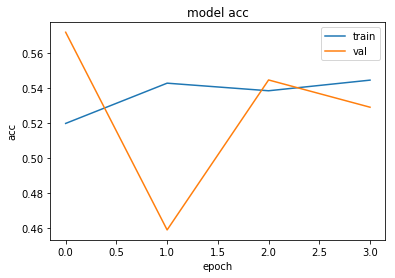

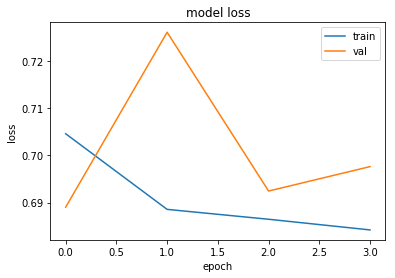

(None, None)

In [310]:
plot_train_val(ann, 'acc'), plot_train_val(ann, 'loss')

# A RNN

In [311]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from keras.models import Model, Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding, SpatialDropout1D, SimpleRNN
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D, RNN
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
import pandas as pd
import numpy as np
np.random.seed(0)
from nltk import word_tokenize
from gensim.models import word2vec

In [313]:
max_fatures = 3000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df_2['tweet'].values)
X = tokenizer.texts_to_sequences(df_2['tweet'].values)
X = pad_sequences(X)

In [314]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 28, 128)           384000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 28, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_148 (Dense)            (None, 2)                 394       
Total params: 639,194
Trainable params: 639,194
Non-trainable params: 0
_________________________________________________________________
None


In [315]:
y = pd.get_dummies(df['signal_y']).values
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

((2564, 28), (2564, 2))
((641, 28), (641, 2))


In [316]:
model.fit(X_train_2, y_train_2, epochs=20, validation_split=0.1, batch_size=42, verbose=2)

Train on 2307 samples, validate on 257 samples
Epoch 1/20
 - 79s - loss: 0.6933 - acc: 0.5121 - val_loss: 0.6963 - val_acc: 0.5097
Epoch 2/20
 - 82s - loss: 0.6678 - acc: 0.6192 - val_loss: 0.7142 - val_acc: 0.5292
Epoch 3/20
 - 79s - loss: 0.5814 - acc: 0.7016 - val_loss: 0.7767 - val_acc: 0.5175
Epoch 4/20
 - 73s - loss: 0.4682 - acc: 0.7726 - val_loss: 0.9185 - val_acc: 0.4630
Epoch 5/20
 - 77s - loss: 0.3584 - acc: 0.8329 - val_loss: 1.0763 - val_acc: 0.4669
Epoch 6/20
 - 73s - loss: 0.2789 - acc: 0.8780 - val_loss: 1.3342 - val_acc: 0.4825
Epoch 7/20
 - 76s - loss: 0.2320 - acc: 0.8919 - val_loss: 1.4915 - val_acc: 0.4708
Epoch 8/20
 - 71s - loss: 0.2098 - acc: 0.9049 - val_loss: 1.5861 - val_acc: 0.4630
Epoch 9/20
 - 72s - loss: 0.1782 - acc: 0.9179 - val_loss: 1.7204 - val_acc: 0.4669
Epoch 10/20
 - 75s - loss: 0.1554 - acc: 0.9304 - val_loss: 1.8375 - val_acc: 0.4669
Epoch 11/20
 - 98s - loss: 0.1358 - acc: 0.9400 - val_loss: 2.0005 - val_acc: 0.4669
Epoch 12/20
 - 90s - loss: 

In [318]:
score,acc = model.evaluate(X_test_2, y_test_2, verbose = 2, batch_size = 32)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 2.52
acc: 0.53


In [319]:
plot_train_val(model, 'acc'), plot_train_val(model, 'loss')

TypeError: 'History' object has no attribute '__getitem__'

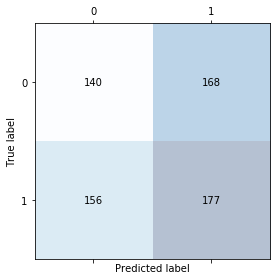

In [365]:
y_pred_test_model =  model.predict_classes(X_test_2, batch_size=20, verbose=0)
confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test_model)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# Next NN

In [327]:
# delete kernel_initializer
model2 = Sequential()
model2.add(Dense(20, input_dim=803, kernel_initializer='normal', activation='tanh'))
model2.add(Dense(20, kernel_initializer='normal', activation='tanh'))
model2.add(Dropout(0.01))
model2.add(Dense(20, kernel_initializer='normal', activation='tanh'))
model2.add(Dropout(0.01))
model2.add(Dense(20, kernel_initializer='normal', activation='tanh'))
model2.add(Dropout(0.01))
model2.add(Dense(20, kernel_initializer='normal', activation='tanh'))
model2.add(Dense(10, activation='tanh'))
model2.add(Dense(10, activation='tanh'))
model2.add(Dense(2, activation='softmax'))
adam2 = optimizers.Adam(lr=.05, decay=0.0005)
model2.compile(loss='binary_crossentropy', optimizer=adam2, metrics=['accuracy'])
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 20)                16080     
_________________________________________________________________
dense_166 (Dense)            (None, 20)                420       
_________________________________________________________________
dropout_10 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_167 (Dense)            (None, 20)                420       
_________________________________________________________________
dropout_11 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_168 (Dense)            (None, 20)                420       
_________________________________________________________________
dropout_12 (Dropout)         (None, 20)                0         
__________

In [328]:
m2 = model2.fit(X_train, y_train, epochs=7, validation_split=.1, batch_size=20, verbose=1)




Train on 2307 samples, validate on 257 samples
Epoch 1/7
2307/2307 [==============================] - 6s 3ms/step - loss: 0.7151 - acc: 0.4831 - val_loss: 0.7314 - val_acc: 0.5681
Epoch 2/7
2307/2307 [==============================] - 1s 544us/step - loss: 0.7119 - acc: 0.5013 - val_loss: 0.6876 - val_acc: 0.5798
Epoch 3/7
2307/2307 [==============================] - 1s 518us/step - loss: 0.7180 - acc: 0.4926 - val_loss: 0.7350 - val_acc: 0.5642
Epoch 4/7
2307/2307 [==============================] - 1s 525us/step - loss: 0.7115 - acc: 0.5065 - val_loss: 0.7033 - val_acc: 0.5642
Epoch 5/7
2307/2307 [==============================] - 1s 517us/step - loss: 0.7054 - acc: 0.5225 - val_loss: 0.7190 - val_acc: 0.4358
Epoch 6/7
2307/2307 [==============================] - 1s 522us/step - loss: 0.7130 - acc: 0.4818 - val_loss: 0.6883 - val_acc: 0.5642
Epoch 7/7
2307/2307 [==============================] - 1s 556us/step - loss: 0.7068 - acc: 0.5182 - val_loss: 0.7032 - val_acc: 0.4280


In [329]:
# score for the test data no tweet model: 0.6923892
# acc for the test data  no tweet model: 0.5195008
# score for the training data no tweet model: 0.6919532
# acc for the training data no tweet model: 0.5247660

In [330]:
model_2_score_no_tweet, model_2_acc_no_tweet = model2.evaluate(X_test, y_test, verbose = 2, batch_size = 32)
print("score for the test data no tweet model: %.7f" % (model_2_score_no_tweet))
print("acc for the test data  no tweet model: %.7f" % (model_2_acc_no_tweet))

model_2_score_train_no_tweet, model_2_acc_train_no_tweet = model2.evaluate(X_train, y_train, verbose = 2, batch_size = 32)
print("score for the training data no tweet model: %.7f" % (model_2_score_train_no_tweet))
print("acc for the training data no tweet model: %.7f" % (model_2_acc_train_no_tweet))

score for the test data no tweet model: 0.6976197
acc for the test data  no tweet model: 0.4804992
score for the training data no tweet model: 0.6966842
acc for the training data no tweet model: 0.4752340


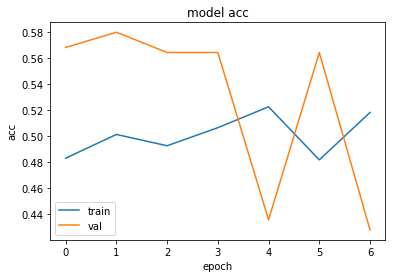

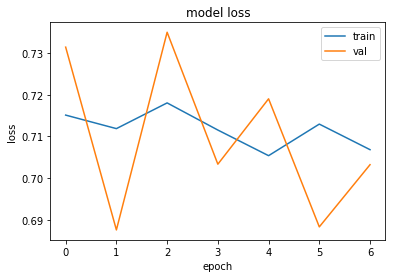

(None, None)

In [331]:
plot_train_val(m2, 'acc'), plot_train_val(m2, 'loss')

In [362]:
y_pred_test_model2 =  model2.predict_classes(X_test, batch_size=20, verbose=0)

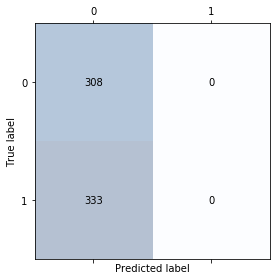

In [363]:
confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test_model2)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# Another NN

In [353]:
classifier2 = Sequential()
randuni = initializers.VarianceScaling(scale=.9, mode='fan_in', distribution='normal', seed=None) # RandomUniform(minval=-0.05, maxval=0.05, seed=None)
classifier2.add(Dense(200, kernel_initializer=randuni, activation = 'relu'))
classifier2.add(Dense(100, activation = 'tanh'))
classifier2.add(Dense(100, activation = 'tanh'))
classifier2.add(Dense(50, kernel_regularizer=regularizers.l1(0.8), activation='tanh'))
classifier2.add(Dense(10, kernel_regularizer=regularizers.l1(0.8), activation='relu'))
# classifier.add(Dense(5, kernel_regularizer=regularizers.l2(0.05), activation='relu'))
# classifier.add(Dense(5, activation = 'tanh'))
classifier2.add(Dense(2, activation = 'softmax'))
adam = optimizers.Adam(lr=.05, decay=0.0005)
classifier2.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy']) 

In [354]:
c2 = classifier2.fit(X_train, y_train, epochs=20, validation_split=.1, batch_size=20, verbose=1)


Train on 2307 samples, validate on 257 samples
Epoch 1/20
2307/2307 [==============================] - 9s 4ms/step - loss: 48.5700 - acc: 0.4887 - val_loss: 27.2226 - val_acc: 0.5720
Epoch 2/20
2307/2307 [==============================] - 3s 1ms/step - loss: 26.5637 - acc: 0.5191 - val_loss: 25.9068 - val_acc: 0.4280
Epoch 3/20
2307/2307 [==============================] - 3s 1ms/step - loss: 24.9017 - acc: 0.5074 - val_loss: 24.0970 - val_acc: 0.5720
Epoch 4/20
2307/2307 [==============================] - 4s 2ms/step - loss: 23.4233 - acc: 0.5108 - val_loss: 22.4979 - val_acc: 0.5720
Epoch 5/20
2307/2307 [==============================] - 4s 2ms/step - loss: 22.0538 - acc: 0.5143 - val_loss: 23.3758 - val_acc: 0.5720
Epoch 6/20
2307/2307 [==============================] - 4s 2ms/step - loss: 20.8817 - acc: 0.5061 - val_loss: 19.3517 - val_acc: 0.4280
Epoch 7/20
2307/2307 [==============================] - 3s 2ms/step - loss: 19.8014 - acc: 0.5043 - val_loss: 19.0314 - val_acc: 0.5720
E

In [355]:
classifier2_score_no_tweet, classifier2_acc_no_tweet = classifier2.evaluate(X_test, y_test, verbose = 2, batch_size = 32)
print("score for the test data no tweet model: %.7f" % (classifier2_score_no_tweet))
print("acc for the test data  no tweet model: %.7f" % (classifier2_acc_no_tweet))

classifier2_score_train_no_tweet, classifier2_acc_train_no_tweet = classifier2.evaluate(X_train, y_train, verbose = 2, batch_size = 32)
print("score for the training data no tweet model: %.7f" % (classifier2_score_train_no_tweet))
print("acc for the training data no tweet model: %.7f" % (classifier2_acc_train_no_tweet))

score for the test data no tweet model: 12.2792954
acc for the test data  no tweet model: 0.4804992
score for the training data no tweet model: 12.2792994
acc for the training data no tweet model: 0.4752340


In [356]:
# score for the test data no tweet model: 0.692
# acc for the test data  no tweet model: 0.5195008
# score for the training data no tweet model: 0.692
# acc for the training data no tweet model: 0.5247660

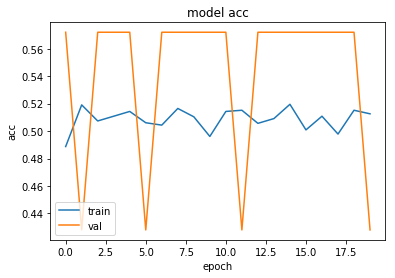

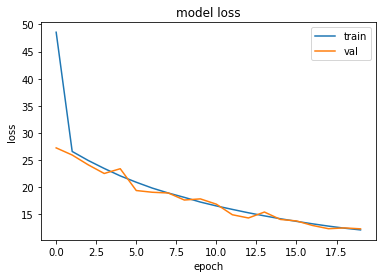

(None, None)

In [357]:
plot_train_val(c2, 'acc'), plot_train_val(c2, 'loss')

In [358]:
y_pred_test =  classifier2.predict_classes(X_test, batch_size=20, verbose=0)

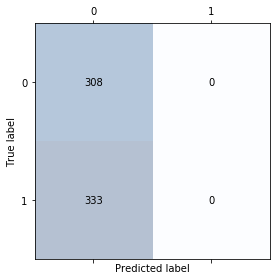

In [359]:
confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
